# Day 1 - Data foundations practical tasks
***

These tasks cover data preparation, visualization and feature engineering topics.

## Explore the datasets and answer the questions below.
#### Here are some guidlines and advices you should consider:
* you can add as many cells as is comfortable for you for each answer
* some questions require your explanation. Add a cell and choose a markdown option in the menu
* when you are making plots, please add labels to the axes

For this task you will use red wine dataset

In [6]:
import pandas as pd
import numpy as np
wine_data = pd.read_csv('/content/winequality-red.csv', sep = ';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
wine_data.isnull().values.sum()

np.int64(0)

### 1. `quality` attribute in the DataFrame has a score from 0 to 10. How many observations (rows) belong to each score level?

In [10]:
wine_data['quality'].value_counts().sort_index()

,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


### 2. Make a bar plot, where we can see distribution of the samples against quality attributes.

In [3]:
import matplotlib.pyplot as plt

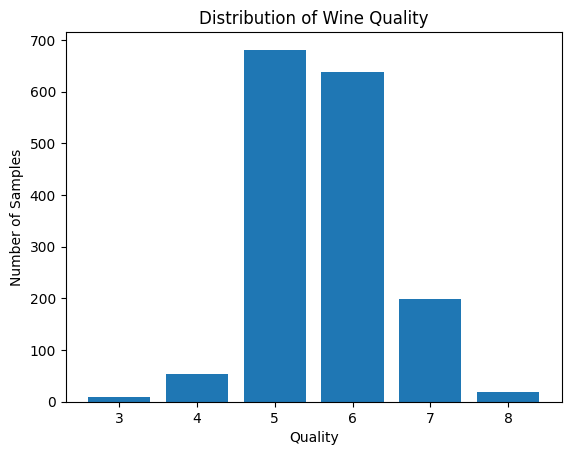

In [12]:
quality_counts = wine_data['quality'].value_counts().sort_index()
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel('Quality')
plt.ylabel('Number of Samples')
plt.title('Distribution of Wine Quality')
plt.show()

### 3. What is the average value of each feature (column) in each `quality` score level?

In [13]:
avg_quality = wine_data.groupby('quality').mean()
display(avg_quality)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


As the quality increases there is increase in alcohol and citric acid.

### 4. What is the median value of each feature (column) in each `quality` score level?

In [15]:
med_by_quality = wine_data.groupby('quality').median()
display(med_by_quality)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.50,0.845,0.035,2.1,0.0905,6.0,15.0,0.997565,3.39,0.545,9.925
4,7.50,0.670,0.090,2.1,0.0800,11.0,26.0,0.996500,3.37,0.560,10.000
5,7.80,0.580,0.230,2.2,0.0810,15.0,47.0,0.997000,3.30,0.580,9.700
6,7.90,0.490,0.260,2.2,0.0780,14.0,35.0,0.996560,3.32,0.640,10.500
7,8.80,0.370,0.400,2.3,0.0730,11.0,27.0,0.995770,3.28,0.740,11.500
8,8.25,0.370,0.420,2.1,0.0705,7.5,21.5,0.994940,3.23,0.740,12.150


### 5. We can notice that for some features raw values differ significantly. Scale the data (except quality column) using Min-Max Scaling manually (create formula yourself). Then use built-in Min-Max Scaling function to validate results (display the resulting data frames separately).
#### Hint: you can use `pd.DataFrame(<your data>)` to display the result of the built-in function in a nicer way.

Prepare the columns to be scaled for min-max scaling function

In [17]:
columns_to_scale = [col for col in wine_data.columns if col != 'quality']
wine_data_scaled = wine_data[columns_to_scale]
print( columns_to_scale)
print("First 5 rows of the DataFrame to be scaled:")
display(wine_data_scaled.head())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
First 5 rows of the DataFrame to be scaled:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


calculate the min and max value to prepare the formula X-Xmin/Xmax-Xmin
We use lambda function which is anonymus function to write a one line code or rules

In [19]:
X_min = wine_data_scaled.min()
X_max = wine_data_scaled.max()

# Calculate the diff (X_max - X_min)
feature_range = X_max - X_min
# Applied Lambda function for manual calculation
data_manual_scaled = wine_data_scaled.apply(lambda x: (x - X_min[x.name]) / (feature_range[x.name] if feature_range[x.name] != 0 else 1))

# For columns where feature_range was zero, set the scaled values to 0
for col in data_manual_scaled.columns:
    if feature_range[col] == 0:
        data_manual_scaled[col] = 0
display(data_manual_scaled.head())

Manually scaled data (first 5 rows):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


Using built in min-max scalar function
Used Pandas to display the result in a structured format.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
df_data_scaled = scaler.fit_transform(wine_data)
pd.DataFrame(df_data_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


### 6. Create correlation matrix between all variables.

In [24]:
corr = wine_data.select_dtypes(include=['number']).corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


correlation between all the variables

In [23]:
correlation_matrix = wine_data.corr()
display(correlation_matrix)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


There is some correlation between Citric acid and Quality is 0.22 but its not strong

```
# This is formatted as code
```



### 7. Plot heatmap to see correlations.

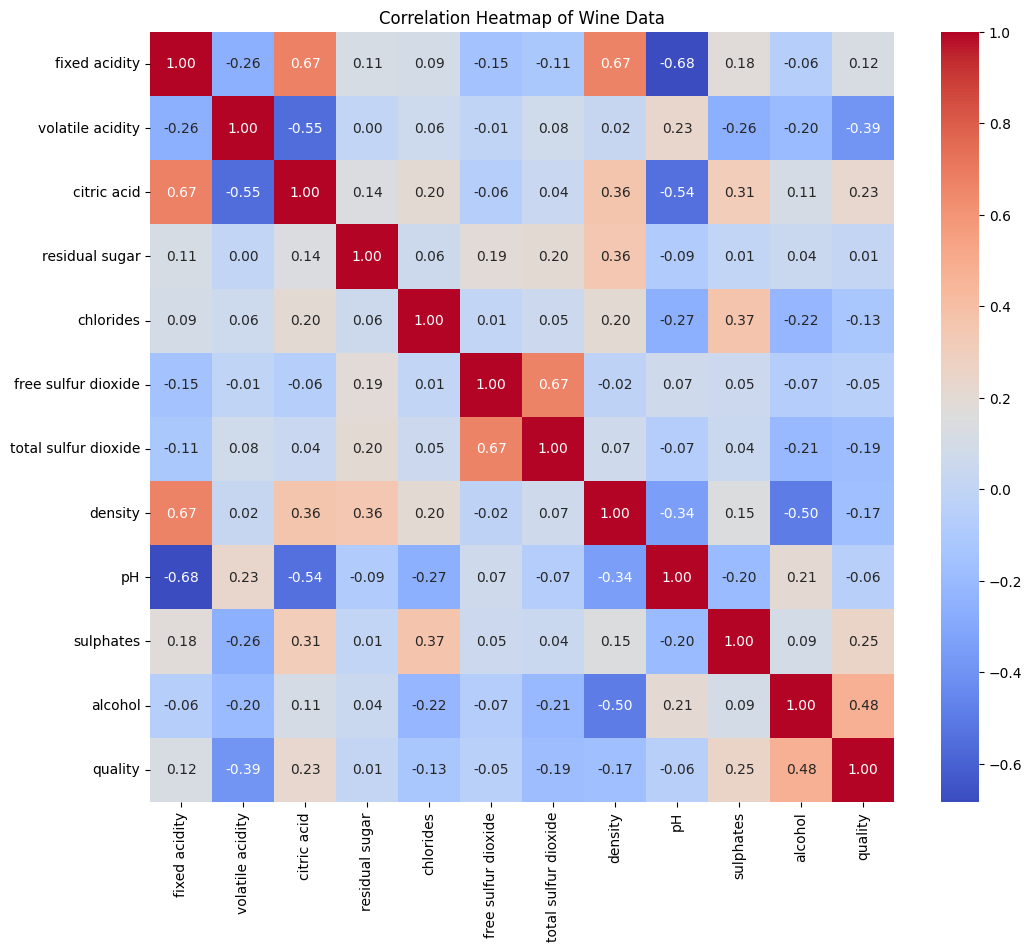

In [25]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Wine Data')
plt.show()

### 8. Identify the first and last 10% of data outliers in `alcohol`

In [27]:
alcohol_ol = wine_data['alcohol']

lower_threshold = alcohol_ol.quantile(0.10)  # 10th percentile
lower_outliers = pd.DataFrame(alcohol_ol[alcohol_ol < lower_threshold])  # Below 10th percentile
lower_outliers

,alcohol
10,9.20
13,9.10
14,9.20
15,9.20
18,9.00
...,...
1515,9.25
1521,9.05
1533,9.00
1568,9.20


In [29]:
upper_threshold = alcohol_ol.quantile(0.90)  # 90th percentile
upper_outliers = pd.DataFrame(alcohol_ol[alcohol_ol > upper_threshold])  # Above 90th percentile
display(upper_outliers)

,alcohol
45,13.1
95,12.9
131,13.0
132,13.0
142,14.0
...,...
1490,12.4
1547,12.1
1570,12.4
1573,12.5


### 9. Plot boxplots for all columns (except quality), use figure size 15x6. You can use both original and scaled data for this task. Try to interpret the data for one feature of your choice and write your observations.

In [33]:
wine_data_for_boxplot = wine_data.drop('quality', axis=1)
display(wine_data_for_boxplot.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


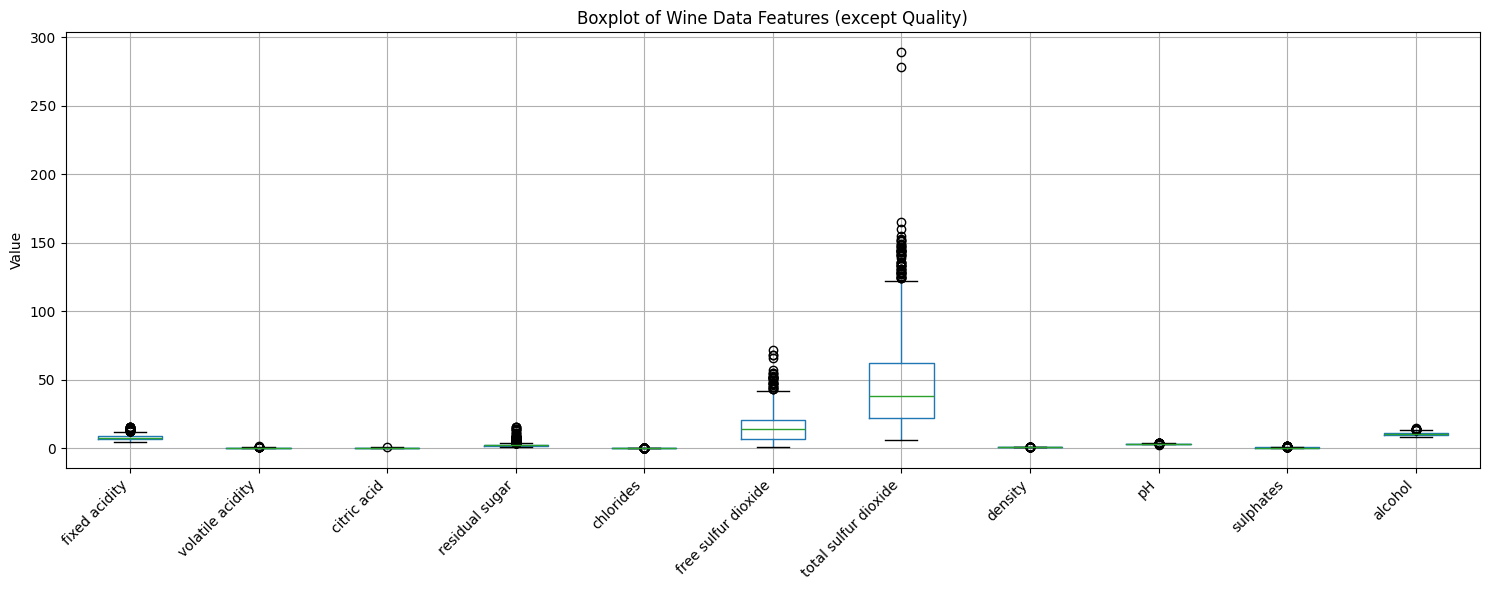

In [35]:
plt.figure(figsize=(15, 6))
wine_data_for_boxplot.boxplot()
plt.title('Boxplot of Wine Data Features (except Quality)')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 10. Plot boxplot of Ph for each quality type.

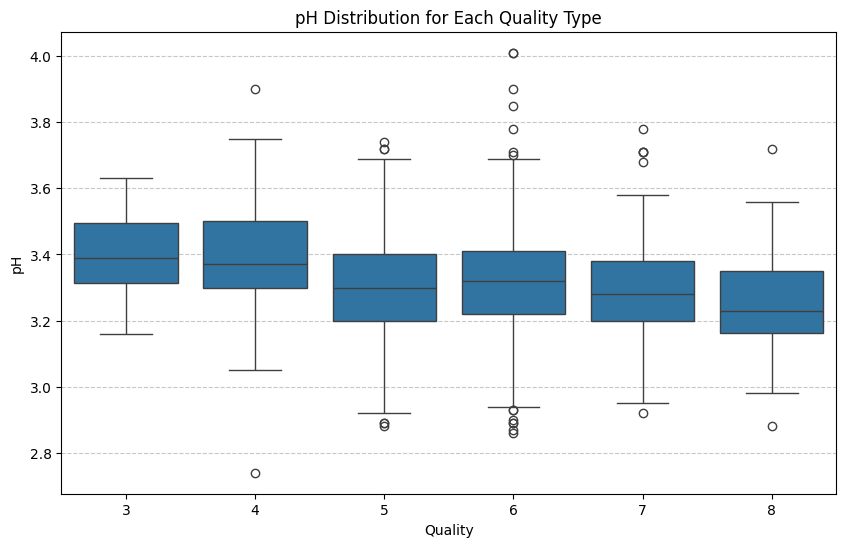

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='pH', data=wine_data)
plt.title('PH Distribution for Each Quality Type')
plt.xlabel('Quality')
plt.ylabel('PH')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 11. Plot scatter plot for `quality` and column with strongest correlation to it. Does alcohol influence the quality of the wine?

The feature with the strongest correlation to 'quality' is 'alcohol' with a correlation of 0.476.


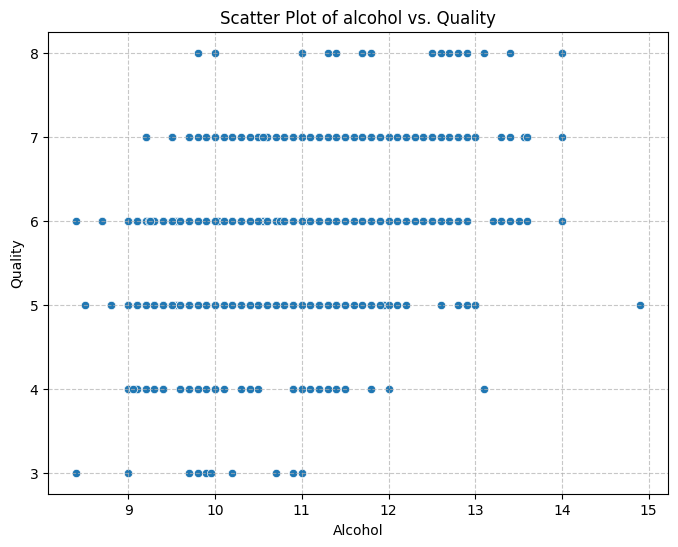

In [37]:
correlation_with_quality = wine_data.corr()['quality'].drop('quality')
strongest_corr_feature = correlation_with_quality.abs().idxmax()
strongest_corr_value = correlation_with_quality.loc[strongest_corr_feature]

print(f"The feature with the strongest correlation to 'quality' is '{strongest_corr_feature}' with a correlation of {strongest_corr_value:.3f}.")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=strongest_corr_feature, y='quality', data=wine_data)
plt.title(f'Scatter Plot of {strongest_corr_feature} vs. Quality')
plt.xlabel(strongest_corr_feature.replace('_', ' ').title())
plt.ylabel('Quality')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

There is moderatly strong positive correlation between alcohol and quality

### 12. Plot scatter plot for any two columns and color it by `quality` number. Add color legend and write your observations.

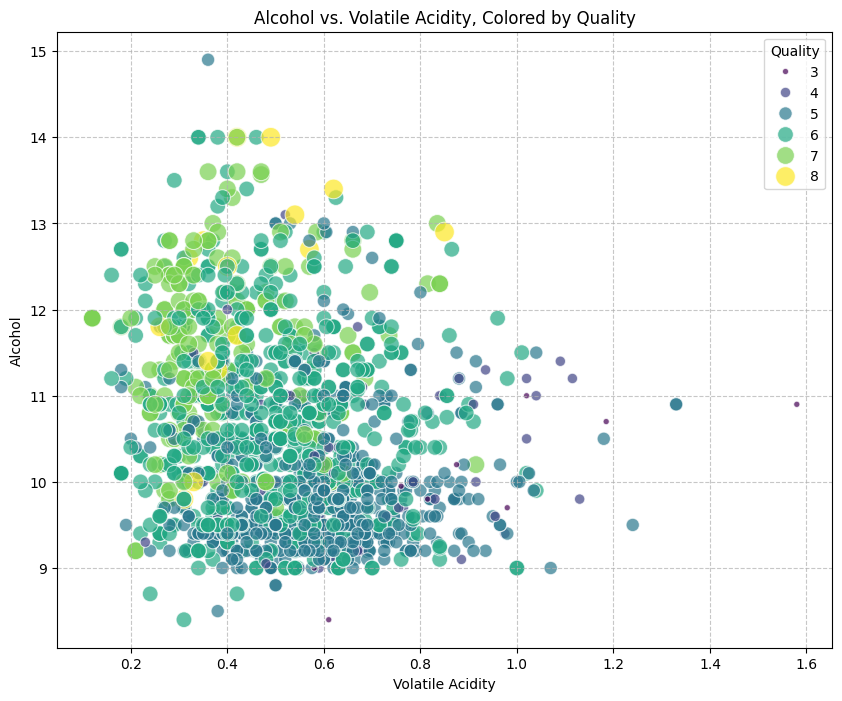

In [38]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='volatile acidity', y='alcohol', hue='quality', data=wine_data, palette='viridis', size='quality', sizes=(20, 200), alpha=0.7)
plt.title('Alcohol vs. Volatile Acidity, Colored by Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Alcohol')
plt.legend(title='Quality')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Looking at the scatter plot of 'Alcohol' vs. 'Volatile Acidity' colored by 'Quality', several observations can be made:

There appears to be a general inverse relationship between volatile acidity and alcohol content, particularly for higher quality wines.
Higher quality wines (e.g., quality 7 and 8, shown in lighter colors and larger dots) generally tend to have lower volatile acidity and higher alcohol content.
Acidity: Wines with very high volatile acidity (e.g., above 0.8) are almost exclusively associated with lower quality scores.
Alcohol Impact: Wines with higher alcohol content (e.g., above 12.0) are predominantly associated with higher quality scores.

This plot visually confirms the correlations observed earlier: alcohol positively correlates with quality, and volatile acidity negatively correlates with quality.

### 13. Create X, y for independent variables (all except `quality`) and target variable `quality`, perform k-fold k=3 split on them and calculate and print out the length of training set and testing set for each fold

In [39]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

print("First 5 rows of X (independent variables):")
display(X.head())

print("\nFirst 5 rows of y (target variable):")
display(y.head())

First 5 rows of X (independent variables):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4



First 5 rows of y (target variable):


,quality
0,5
1,5
2,5
3,6
4,5


Initialize a K-Fold cross-validator with k=3 for X and y, then iterate through each fold to split X and y into training and testing sets, and print the length of the training and testing sets for each fold

In [41]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"\nFold {fold + 1}:")
    print(f"Length of training set (X_train): {len(X_train)}")
    print(f"Length of testing set (X_test): {len(X_test)}")
    print(f"Length of training set (y_train): {len(y_train)}")
    print(f"Length of testing set (y_test): {len(y_test)}")


Fold 1:
Length of training set (X_train): 1066
Length of testing set (X_test): 533
Length of training set (y_train): 1066
Length of testing set (y_test): 533

Fold 2:
Length of training set (X_train): 1066
Length of testing set (X_test): 533
Length of training set (y_train): 1066
Length of testing set (y_test): 533

Fold 3:
Length of training set (X_train): 1066
Length of testing set (X_test): 533
Length of training set (y_train): 1066
Length of testing set (y_test): 533


Review the output to confirm the correct splitting of data into training and testing sets for each of the 3 folds.

### 14. Create two new features:
- Sulfur dioxide ration (`free sulfur dioxide` / `total sulfur dioxide`)
- Total acidity (`fixed acidity` + `volatile acidity` + `citric acid`)

In [42]:
#Sulfur dioxide ratio
wine_data['sulfur_dioxide_ratio'] = wine_data['free sulfur dioxide'] / wine_data['total sulfur dioxide']

#Total acidity
wine_data['total_acidity'] = wine_data['fixed acidity'] + wine_data['volatile acidity'] + wine_data['citric acid']

print("DF with new features:")
display(wine_data.head())

DataFrame with new features:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sulfur_dioxide_ratio,total_acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.323529,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.373134,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.277778,8.60
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.283333,12.04
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.323529,8.10


### 15. Create a sample dataset with dates for a whole week. Extract day of the week with `dayofweek` function (0=Monday, 6=Sunday). Additionally flag weekends by creating another new `is_weekend` feature.

In [44]:
# Date range start and end period
dates = pd.date_range(start='2023-01-01', periods=7, freq='D')
weekly_data = pd.DataFrame({'Date': dates})

# Extract day of the week
weekly_data['day_of_week'] = weekly_data['Date'].dt.dayofweek

# Flag weekends
weekly_data['is_weekend'] = weekly_data['day_of_week'].isin([5, 6])

display(weekly_data.head(7))

,Date,day_of_week,is_weekend
0,2023-01-01,6,True
1,2023-01-02,0,False
2,2023-01-03,1,False
3,2023-01-04,2,False
4,2023-01-05,3,False
5,2023-01-06,4,False
6,2023-01-07,5,True
